In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Loading & preprocessing datasetd

Breast cancer ds

In [5]:
breast_cancer_df = pd.read_csv("wdbc.data" , header=None)  
print(breast_cancer_df.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

preprocess breast cancer dataset as per requirements

In [6]:
malignant_df = breast_cancer_df[breast_cancer_df[1] == 'M']
malignant_outliers = malignant_df.head(10)

benign_df = breast_cancer_df[breast_cancer_df[1] == 'B']

processed_cancer_df = pd.concat([malignant_outliers, benign_df])
processed_cancer_df = processed_cancer_df.reset_index(drop=True)

print(processed_cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       367 non-null    int64  
 1   1       367 non-null    object 
 2   2       367 non-null    float64
 3   3       367 non-null    float64
 4   4       367 non-null    float64
 5   5       367 non-null    float64
 6   6       367 non-null    float64
 7   7       367 non-null    float64
 8   8       367 non-null    float64
 9   9       367 non-null    float64
 10  10      367 non-null    float64
 11  11      367 non-null    float64
 12  12      367 non-null    float64
 13  13      367 non-null    float64
 14  14      367 non-null    float64
 15  15      367 non-null    float64
 16  16      367 non-null    float64
 17  17      367 non-null    float64
 18  18      367 non-null    float64
 19  19      367 non-null    float64
 20  20      367 non-null    float64
 21  21      367 non-null    float64
 22  22

In [7]:
X_breast = processed_cancer_df.drop(processed_cancer_df.columns[1], axis=1).to_numpy()

Pen-base

In [8]:
pen_df = pd.read_csv("pendigits.tra", header=None, delimiter=",")  
print(pen_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7494 non-null   int64
 1   1       7494 non-null   int64
 2   2       7494 non-null   int64
 3   3       7494 non-null   int64
 4   4       7494 non-null   int64
 5   5       7494 non-null   int64
 6   6       7494 non-null   int64
 7   7       7494 non-null   int64
 8   8       7494 non-null   int64
 9   9       7494 non-null   int64
 10  10      7494 non-null   int64
 11  11      7494 non-null   int64
 12  12      7494 non-null   int64
 13  13      7494 non-null   int64
 14  14      7494 non-null   int64
 15  15      7494 non-null   int64
 16  16      7494 non-null   int64
dtypes: int64(17)
memory usage: 995.4 KB
None


First option of dataset preprocessing - pen-global

In [9]:
digit_column = pen_df.columns[-1]

anom_pen_df = pen_df[pen_df[digit_column] == 4].head(10)
norm_pen_df = pen_df[pen_df[digit_column] != 4]

processed_pen_df = pd.concat([anom_pen_df, norm_pen_df])
processed_pen_df = processed_pen_df.reset_index(drop=True)
y_pen_global = processed_pen_df[digit_column].to_numpy()
y_pen_global = np.where(y_pen_global == 4, 1, 0)
X_pen_global = processed_pen_df.drop(digit_column, axis=1).to_numpy()

Second option of dataset preprocessing - pen-local

In [10]:
normal_pen_df = pen_df[pen_df[digit_column] == 8]
anormal_pen_df = (
    pen_df[pen_df[digit_column] != 8]
    .groupby(digit_column)
    .head(10)
)

processed_pen2_df = pd.concat([anormal_pen_df, normal_pen_df])
processed_pen2_df = processed_pen2_df.reset_index(drop=True)
y_pen_local = processed_pen2_df[digit_column].to_numpy()
y_pen_local = np.where(y_pen_local == 8, 0, 1)
X_pen_local = processed_pen2_df.drop(digit_column, axis=1).to_numpy()

In [11]:
def get_ds_stats(X):
    n_features = X.shape[1]
    n_intances = X.shape[0]
    k_bins = int(np.sqrt(n_intances))
    
    return n_features, n_intances, k_bins 

In [12]:
def compute_histogam_static(X, k_bins, n_features):
    histograms = []
    bin_edges_list = []
    for feature_idx in range(n_features):
        hist, bin_edges = np.histogram(X[:, feature_idx], bins=k_bins, density=True)
        histograms.append(hist)  # Store histogram densities
        bin_edges_list.append(bin_edges)  # Store bin edges
        
    return histograms, bin_edges_list

In [13]:
def normalize_histograms(histograms):
    histograms = [hist / np.max(hist) for hist in histograms]
    
    return histograms

In [14]:
def compute_hbos_scores_static(X, n_features, n_intances, histograms, bin_edges_list):
    hbos_scores = np.zeros(n_intances)
    eps=1e-9
    
    for i in range(n_intances):
        score = 0
        for feature_idx in range(n_features):
            value = X[i, feature_idx]
            bin_edges = bin_edges_list[feature_idx]
            hist = histograms[feature_idx]

            # Find the bin index for the value
            bin_index = np.digitize(value, bin_edges) - 1
            bin_index = np.clip(bin_index, 0, len(hist) - 1)  

            density = max(hist[bin_index], eps)  # Avoid zero density
            score += -np.log(density)

        hbos_scores[i] = score
    
    return hbos_scores

In [86]:
def dynamic_hist(X, k_bins, n_features, n_instances):
    bin_edges = []
    bin_heights = []
    eps=1e-9
    
    for f in range(n_features):
        sorted_vals = np.sort(X[:, f])
        bin_size = int(np.ceil(n_instances / k_bins))
        intervals = []
        counts = []
        
        current_idx = 0
        while current_idx < n_instances:
            start_val = sorted_vals[current_idx]
            end_idx = min(current_idx + bin_size, n_instances)

            #handle exception case
            end_idx = np.searchsorted(sorted_vals, sorted_vals[end_idx - 1], side="right")
            end_val = sorted_vals[end_idx - 1]

            intervals.append((start_val, end_val)) #crate bin interval 
            counts.append(end_idx - current_idx)  #count number of instances in the bin

            current_idx = end_idx
        
        heights = []
        intervals = np.array(intervals)  # Convert to NumPy array
        widths = np.maximum(intervals[:, 1] - intervals[:, 0], eps)
        heights = np.array(counts) / widths
        heights /= np.max(heights)

        bin_edges.append(intervals)
        bin_heights.append(heights)
    
    return bin_heights, bin_edges

In [77]:
def compute_hbos_scores_dynamic(X, n_features, n_intances, bin_heights, bin_edges):
    eps=1e-9
    hbos_scores = np.zeros(n_intances)
    
    for i in range(n_intances):
        score = 0.0
        for f in range(n_features):
            val = X[i, f]
            intervals = bin_edges[f]
            heights = bin_heights[f]
            edges = np.array([start_val for start_val, _ in intervals])
            b_idx = np.searchsorted(edges, val, side='right') - 1
            b_idx = max(0, min(b_idx, len(intervals) - 1))
            
            density = max(heights[b_idx], eps)
            score += -np.log(density)
    
        hbos_scores[i] = score
    
    return hbos_scores

In [17]:
def perform_eval(hbos_scores, y_true, ds_name):
    fpr, tpr, thresholds = roc_curve(y_true, hbos_scores)

    roc_auc = auc(fpr, tpr)
    print(f"AUC score: {roc_auc:.4f}")

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'HBOS (AUC = {roc_auc:.4f})')
    plt.xlabel('FP rate')
    plt.ylabel('TP rate')
    plt.title(f'ROC curve for HBOS on {ds_name} Dataset')
    plt.legend(loc='lower right')
    plt.show()

In [29]:
def tune_hbos(X, y, k_values, n_features, n_intances):
    """
    Loop over a range of k-values (number of bins) and pick the best based on ROC AUC.
    """
    best_auc = -1
    best_k = None
    best_scores = None

    for k in k_values:
        bins_heights, bins_edges = dynamic_hist(X, k, n_features, n_intances)
        scores = compute_hbos_scores_dynamic(X, n_features, n_intances, bins_heights, bins_edges)
        fpr, tpr, _ = roc_curve(y, scores)
        current_auc = auc(fpr, tpr)
        if current_auc > best_auc:
            best_auc = current_auc
            best_k = k
            best_scores = scores

    print(f"[HBOS] Best k={best_k} => AUC={best_auc:.4f}")
    return best_k, best_scores, best_auc

RESULTS WITH K nr of bins set as rule of thumb

In [18]:
n_features_1, n_intances_1, k_bins_1 = get_ds_stats(X_breast)
y_breast = np.zeros(n_intances_1)
y_breast[:10] = 1

In [15]:
hist_static, bin_edges_static = compute_histogam_static(X_breast, k_bins_1, n_features_1)
hist_static = normalize_histograms(hist_static)
hbos_scores_static_breast = compute_hbos_scores_static(X_breast, n_features_1, n_intances_1, hist_static, bin_edges_static)

AUC score: 0.9838


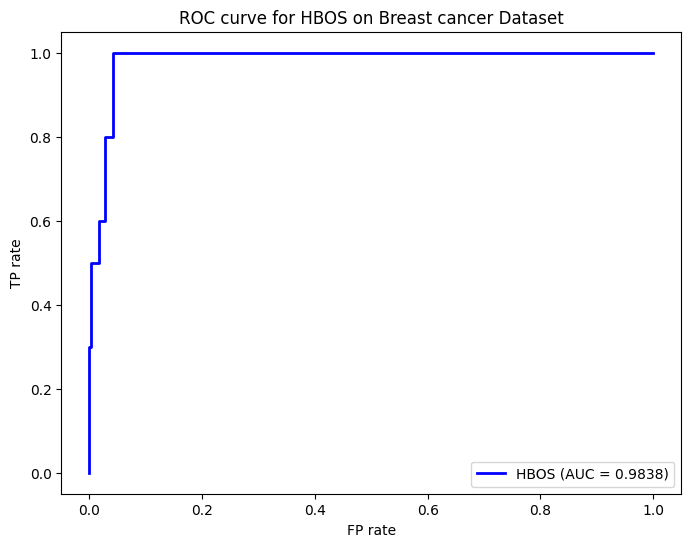

In [33]:
perform_eval(hbos_scores_static_breast, y_breast, "Breast cancer")

AUC score: 0.9742


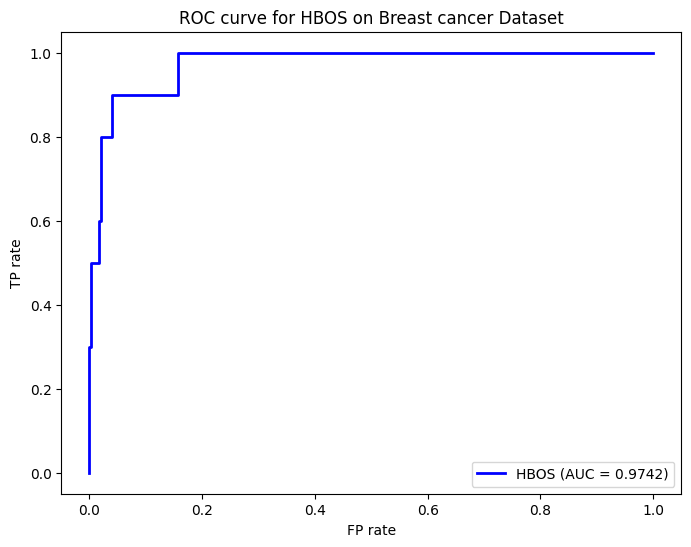

In [87]:
bins_heights1, bins_edges1 = dynamic_hist(X_breast, k_bins_1, n_features_1, n_intances_1)
hbos_scores_dynamic_breast = compute_hbos_scores_dynamic(X_breast, n_features_1, n_intances_1, bins_heights1, bins_edges1)
perform_eval(hbos_scores_dynamic_breast, y_breast, "Breast cancer")

In [23]:
n_features_2, n_intances_2, k_bins_2 = get_ds_stats(X_pen_global)

hist_static_global, bin_edges_static_global = compute_histogam_static(X_pen_global, k_bins_2, n_features_2)
hist_static_global = normalize_histograms(hist_static_global)
hbos_scores_static_pen_global = compute_hbos_scores_static(X_pen_global, n_features_2, n_intances_2, hist_static_global, bin_edges_static_global)

AUC score: 0.7202


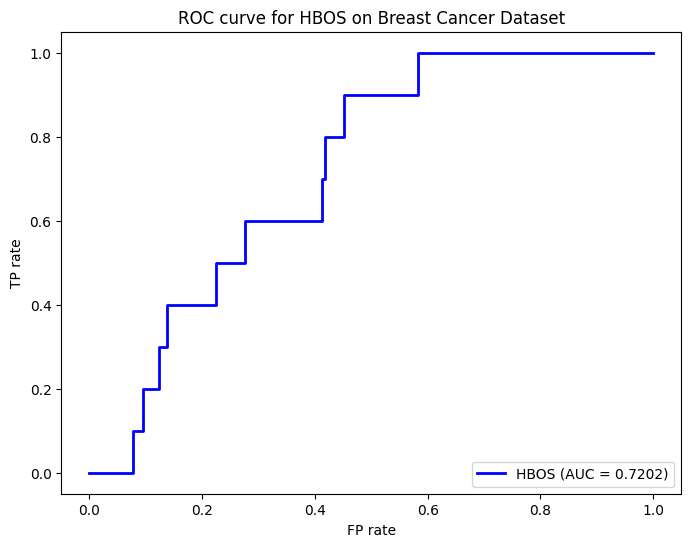

In [20]:
perform_eval(hbos_scores_static_pen_global, y_pen_global, "Pen digits global")

AUC score: 0.8032


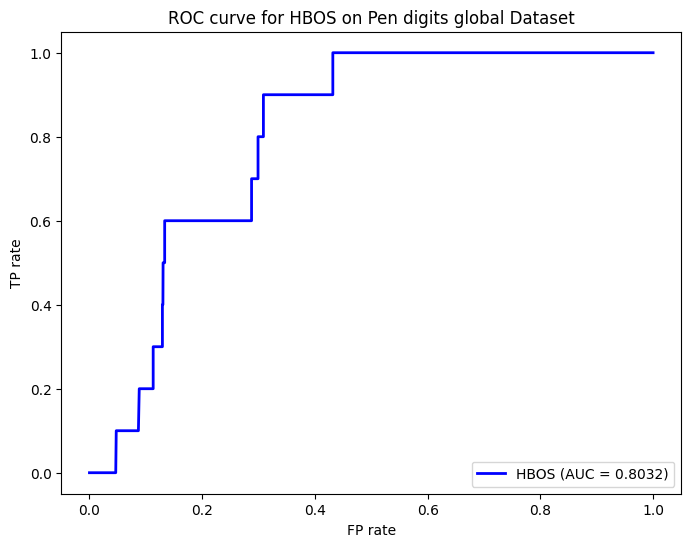

In [88]:
bins_heights2, bins_edges2 = dynamic_hist(X_pen_global, k_bins_2, n_features_2, n_intances_2)
hbos_scores_dynamic_pen_global = compute_hbos_scores_dynamic(X_pen_global, n_features_2, n_intances_2, bins_heights2, bins_edges2)
perform_eval(hbos_scores_dynamic_pen_global, y_pen_global, "Pen digits global")

In [25]:
n_features_3, n_intances_3, k_bins_3 = get_ds_stats(X_pen_local)
hist_static_local, bin_edges_static_local = compute_histogam_static(X_pen_local, k_bins_3, n_features_3)
hist_static_local = normalize_histograms(hist_static_local)
hbos_scores_static_pen_local = compute_hbos_scores_static(X_pen_local, n_features_3, n_intances_3, hist_static_local, bin_edges_static_local)

AUC score: 0.7133


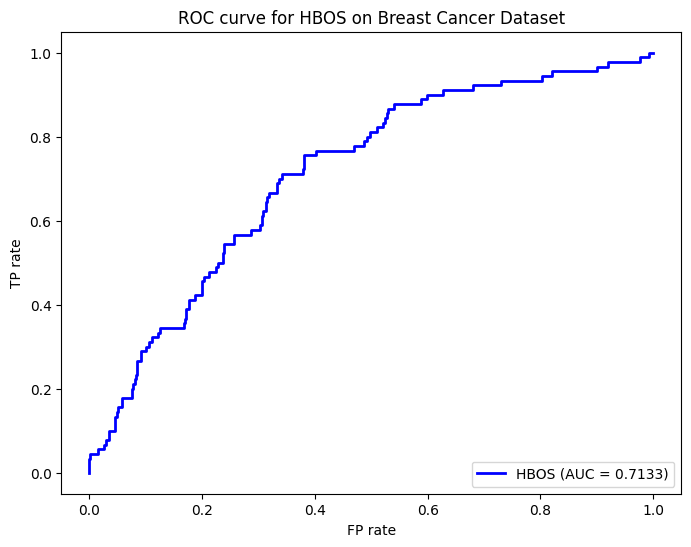

In [ ]:
perform_eval(hbos_scores_static_pen_local, y_pen_local, "Pen digits local")

AUC score: 0.5195


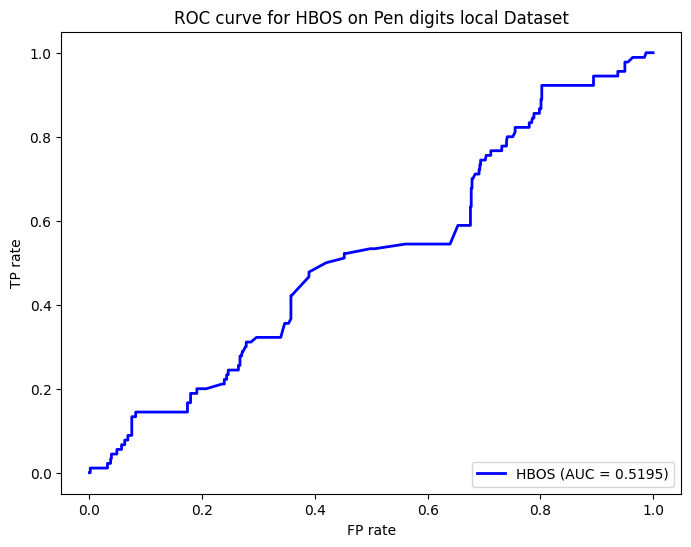

In [89]:
bins_heights3, bins_edges3 = dynamic_hist(X_pen_local, k_bins_3, n_features_3, n_intances_3)
hbos_scores_dynamic_pen_local = compute_hbos_scores_dynamic(X_pen_local, n_features_3, n_intances_3, bins_heights3, bins_edges3)
perform_eval(hbos_scores_dynamic_pen_local, y_pen_local, "Pen digits local")

TUNE K FOR BREAST CANCER DATASET - DYNAMIC WIDTH - starting point: k=square root of N => ~19

[HBOS] Best k=50 => AUC=0.9902


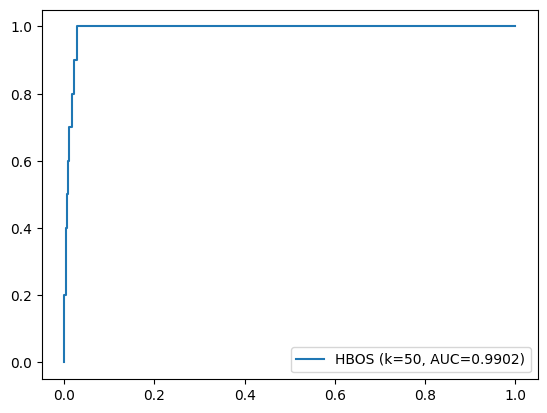

In [81]:
k_values = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
best_k, best_scores, best_auc = tune_hbos(X_breast, y_breast, k_values, n_features_1, n_intances_1)

# Plot the final ROC
fpr, tpr, _ = roc_curve(y_breast, best_scores)
plt.plot(fpr, tpr, label=f'HBOS (k={best_k}, AUC={best_auc:.4f})')
plt.legend()
plt.show()

TUNE K FOR PEN GLOBAL DATASET - DYNAMIC WIDTH - starting point: k=square root of N => ~82

In [42]:
print(X_pen_global.shape)

(6724, 16)


[HBOS] Best k=83 => AUC=0.8032


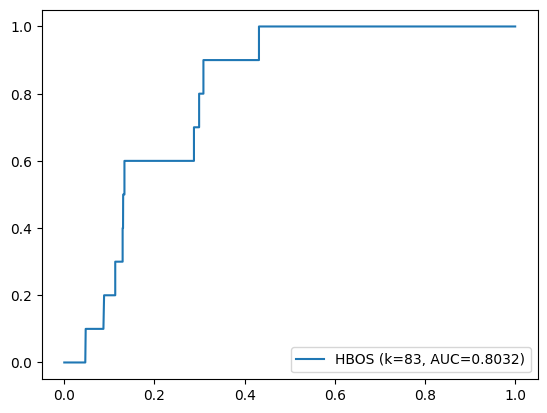

In [82]:
k_values = [77, 80, 83, 85, 87, 90, 95, 100]
best_k, best_scores, best_auc = tune_hbos(X_pen_global, y_pen_global, k_values, n_features_2, n_intances_2)

# Plot the final ROC
fpr, tpr, _ = roc_curve(y_pen_global, best_scores)
plt.plot(fpr, tpr, label=f'HBOS (k={best_k}, AUC={best_auc:.4f})')
plt.legend()
plt.show()

TUNE K FOR PEN GLOBAL DATASET - DYNAMIC WIDTH - starting point: k=square root of N => ~28

In [47]:
print(X_pen_local.shape)

(809, 16)


[HBOS] Best k=40 => AUC=0.6552


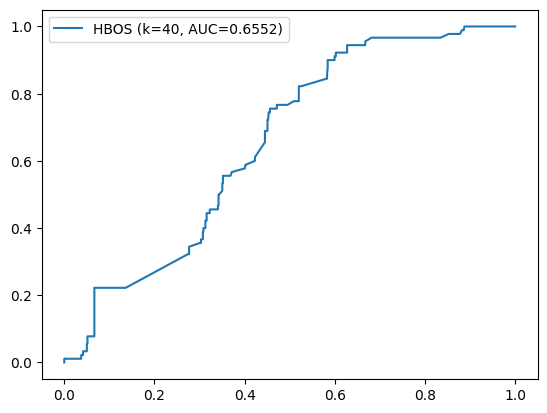

In [83]:
k_values = [25, 28, 30, 35, 40, 45, 50]
best_k, best_scores, best_auc = tune_hbos(X_pen_local, y_pen_local, k_values, n_features_3, n_intances_3)

# Plot the final ROC
fpr, tpr, _ = roc_curve(y_pen_local, best_scores)
plt.plot(fpr, tpr, label=f'HBOS (k={best_k}, AUC={best_auc:.4f})')
plt.legend()
plt.show()

COMPARISON WITH KNN

AUC score: 0.7465


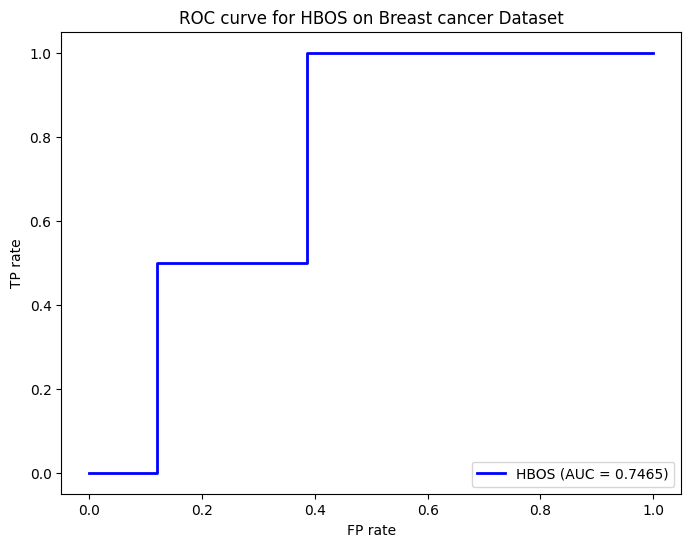

In [96]:
from sklearn.neighbors import NearestNeighbors
def compute_knn_scores(X, k):
    knn_model = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = knn_model.kneighbors(X)
    scores = distances[:, k - 1]
    
    return scores

knn_breast_scores = compute_knn_scores(X_breast, 50)
perform_eval(knn_breast_scores, y_breast, "Breast cancer")

AUC score: 0.9522


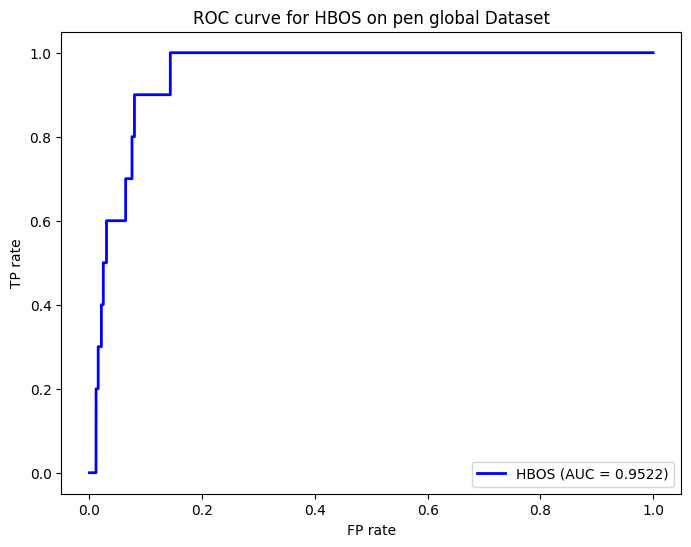

In [91]:
knn_global_scores = compute_knn_scores(X_pen_global, 83)
perform_eval(knn_global_scores, y_pen_global, "pen global")

AUC score: 0.9700


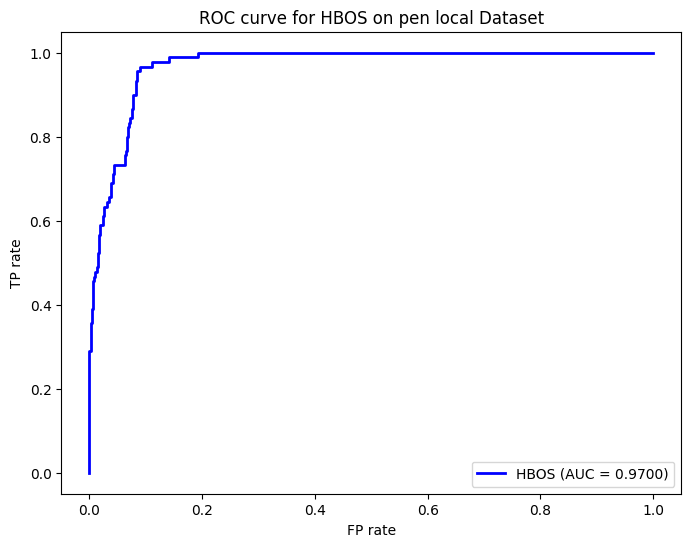

In [92]:
knn_local_scores = compute_knn_scores(X_pen_local, 40)
perform_eval(knn_local_scores, y_pen_local, "pen local")

COMPARISON WITH LOF

In [97]:
from sklearn.neighbors import LocalOutlierFactor

def compute_lof_score(X, k):
    lof = LocalOutlierFactor(n_neighbors=k, novelty=True)
    lof.fit(X)

    scores = -lof.decision_function(X)
    
    return scores

AUC score: 0.8417


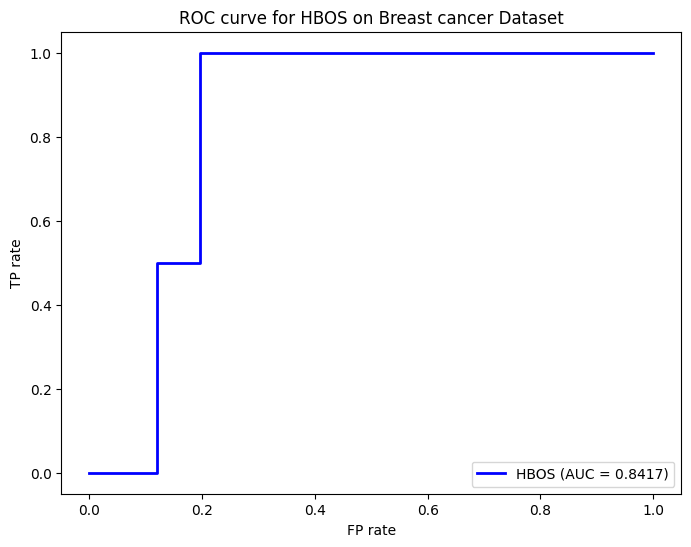

In [101]:
lof_breast_scores = compute_lof_score(X_breast, 50)
perform_eval(lof_breast_scores, y_breast, "Breast cancer")

AUC score: 0.9747


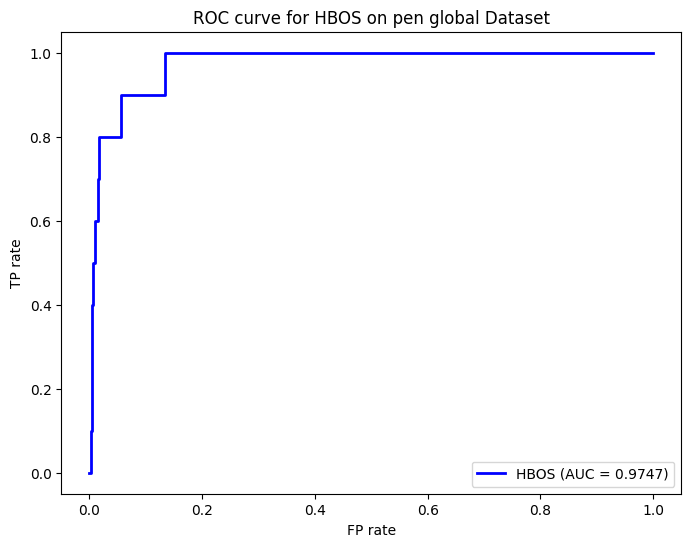

In [102]:
lof_global_scores = compute_lof_score(X_pen_global, 83)
perform_eval(lof_global_scores, y_pen_global, "pen global")

AUC score: 0.8859


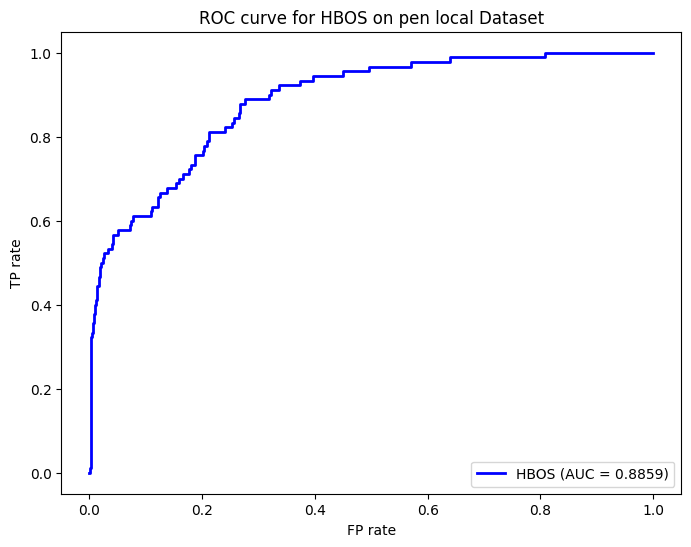

In [103]:
lof_local_scores = compute_lof_score(X_pen_local, 40)
perform_eval(lof_local_scores, y_pen_local, "pen local")